In [1]:
from pfapack import pfaffian as cpf
import adaptive
from systems import get_mti_hamiltonian
import numpy as np
from operator import itemgetter
from systems import make_lead
from funcs import get_default_params2
import pandas as pd
from funcs import majorana_num
import funcs
import adaptive
import kwant 
import kwant.continuum
import warnings
from systems import make_lead

/Users/declanburke/opt/anaconda3/lib/python3.7/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
params=get_default_params2(finite=False)

pfaf_combos = {
    'Delta': [0.005],
    'W': [400]
}

learner_type = adaptive.make_datasaver(adaptive.Learner2D, arg_picker=itemgetter('mn'))
pfaf_learner = adaptive.BalancingLearner.from_product(
    majorana_num, 
    learner_type, 
    dict(bounds=[(0, 0.05), (0.0,0.05)]),
    pfaf_combos
)

In [3]:
pfaf_runner = adaptive.Runner(pfaf_learner)

In [15]:
print(len(pfaf_learner.data))

136


In [16]:
xys_mn, zs_mn = zip(*sorted(pfaf_learner.learners[0].data.items()))

In [17]:
xys_mn=1000*np.array(xys_mn)
zs_mn=np.array(zs_mn)

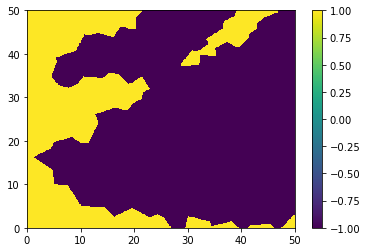

In [18]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
X = np.linspace(0, 50, 501)
Y = np.linspace(0, 50, 501)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = NearestNDInterpolator(xys_mn, zs_mn)
Z = interp(X, Y)
# plt.pcolormesh(X, Y, Z, shading='auto')
cs = plt.pcolormesh(X, Y, Z)
# plt.legend()
# plt.xlim(0,0.05)
plt.colorbar()
plt.show()